In [1]:
#Wpływ położenia biegunów na odpowiedź impulsową w układzie RLC II rzędu

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import sympy
poles_figsize  = (8, 8)
default_figsize = (14, 8)

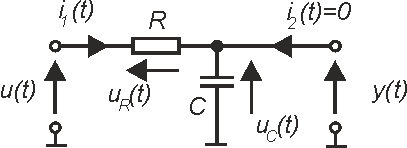

In [2]:
#Wyznacz transmitancję operatorową dla następującego układu I rzędu

s = sympy.Symbol('s', real = 'False', nonzero = 'True')
R = sympy.Symbol('R', real = 'True' , nonzero = 'True')
C = sympy.Symbol('C', real = 'True' , nonzero = 'True')

H1 = (1/(s*C)) / (R+(1/(s*C))) #dzielnik napięcia
display(H1)
display(sympy.simplify(H1))

1/(C*s*(R + 1/(C*s)))

1/(C*R*s + 1)

bieguny = [-1.]



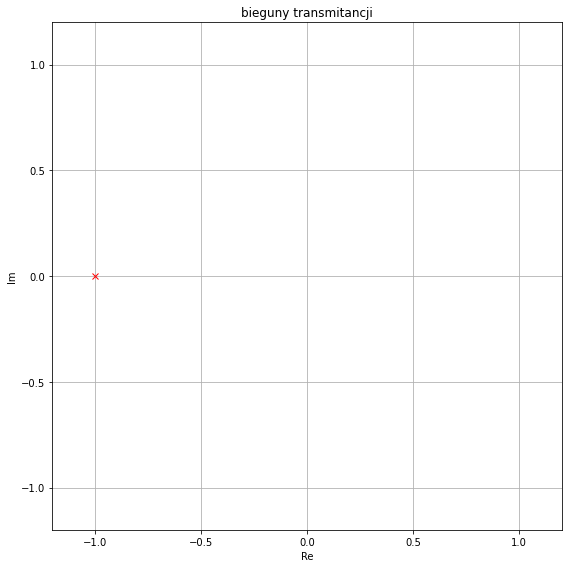

In [9]:
#Dla wyznaczonego mianownika transmitancji wyznacz bieguny 
R = 1
C = 1
B1 = np.poly1d([1])
A1 = np.poly1d([C*R*1, 1])
poles1 = np.roots(A1)
print("bieguny = " + str(poles1))
print()

fig, ax = plt.subplots(1, 1, figsize=poles_figsize)
ax.plot(poles1.real, poles1.imag,'rx')
ax.set_title("bieguny transmitancji")
ax.set_xlabel("Re")
ax.set_ylabel("Im")
ax.set_xlim([-1.2, 1.2])
ax.set_ylim([-1.2, 1.2])
ax.grid()
fig.tight_layout()
fig.show()

1/(C*s*(L*s + R) + 1)

1/(C*L*s**2 + C*R*s + 1)


bieguny = [-0.5+0.8660254j -0.5-0.8660254j]



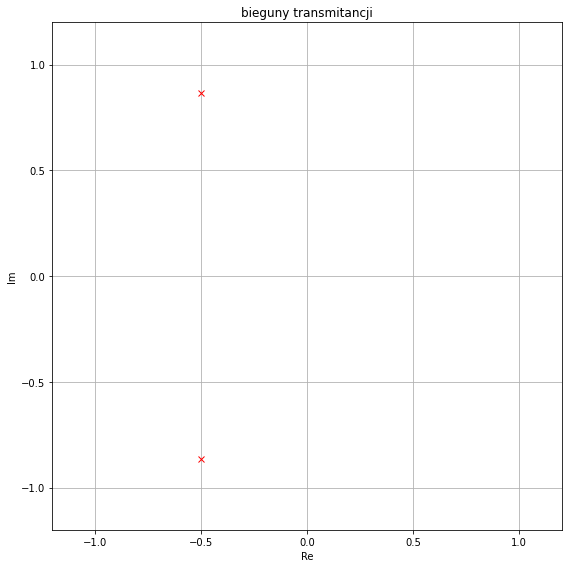

In [10]:
#Dla układu II rzędu przedstawionego poniżej wyznacz transmitancję operatorową i wyznacz położenie biegunów.

#declare symbolic variable s (complex), R,L,C
s = sympy.Symbol('s', real = 'False', nonzero = 'True')
R = sympy.Symbol('R', real = 'True' , nonzero = 'True')
C = sympy.Symbol('C', real = 'True' , nonzero = 'True')
L = sympy.Symbol('L', real = 'True' , nonzero = 'True')

H2 = ((1/(s*C)) / (R + (L*s) + (1/(s*C))))

display(sympy.simplify(H2))
print()
display(sympy.cancel(H2))
print()
C=1
L=1
R=1

#calculate poles
B2 = np.poly1d([1])
A2 = np.poly1d([1, 1, 1])
poles2 = np.roots(A2)
print("bieguny = " + str(poles2))
print()
#plot poles
fig, ax = plt.subplots(1, 1, figsize=poles_figsize)
ax.plot(poles2.real, poles2.imag,'rx')
ax.set_title("bieguny transmitancji")
ax.set_xlabel("Re")
ax.set_ylabel("Im")
ax.set_xlim([-1.2, 1.2])
ax.set_ylim([-1.2, 1.2])
ax.grid()
fig.tight_layout()
fig.show()

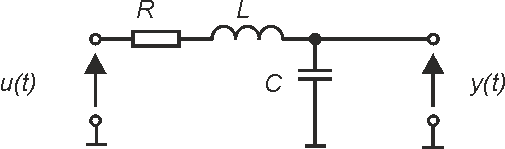

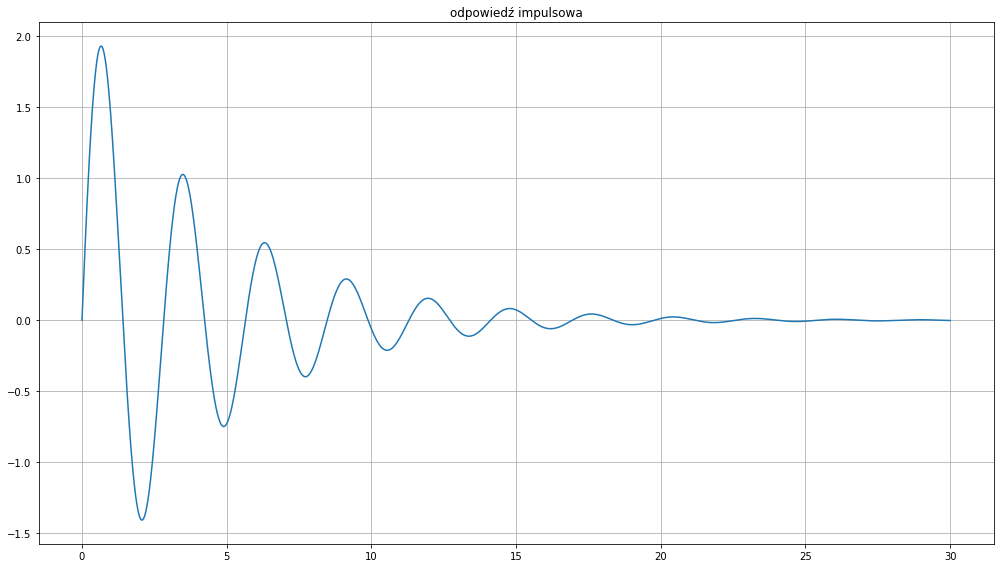

In [11]:
#Układ II rzędu - odpowiedź impulsowa i charakterystykę amplitudowo-fazowa

def calculateImpulseResponseFromNumDen(B, A, TimeDomain):
    step = scipy.signal.impulse(scipy.signal.tf2ss(B, A), T=TimeDomain)[1]
    return step

L= 1
C= 0.2
ξ= 0.1

#transmitancja
ω0 = (1/np.sqrt(L*C))
B  = np.poly1d([           ω0**2])
A  = np.poly1d([1, 2*ξ*ω0, ω0**2])

#odpowiedź impulsowa
time    = np.linspace(0, 30, 2000)
impulse = calculateImpulseResponseFromNumDen(B, A, time)

figI, axI = plt.subplots(1, 1, figsize=default_figsize)
axI.plot(time, impulse)
axI.set_title("odpowiedź impulsowa")
axI.grid()
figI.tight_layout()  
figI.show()

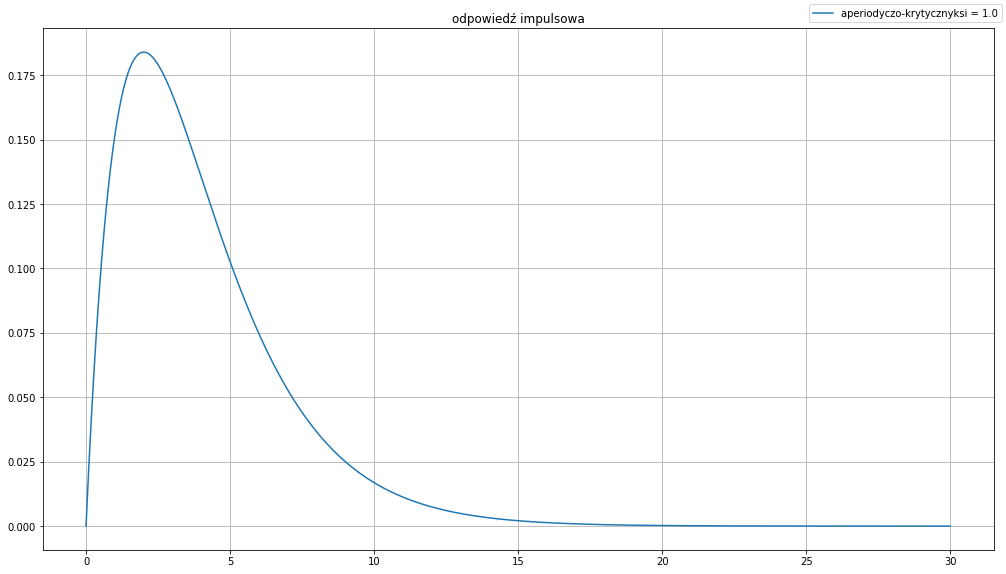

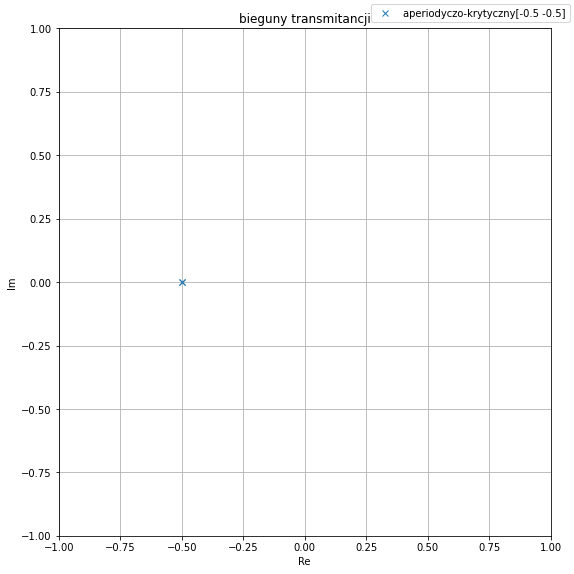

In [12]:
#Analiza zmiany charakteru odpowiedzi impulsowej oraz zmiany położenia biegunów w funkcji zmiany wartości współczynnika tłumienia

time = np.linspace(0, 30, 2000)    

Systems = { #"przetłumiony"              : { "R" : 5  , "L" : 4, "C" : 1 },
            #"generator"                 : { "R" : 0  , "L" : 4, "C" : 1 },
            "aperiodyczo-krytyczny"     : { "R" :  1 , "L" : 1, "C" : 4 },
            #"gasnace"                    : { "R" :  2 , "L" : 2, "C" : 1 },
}

figI, axI = plt.subplots(1, 1, figsize=default_figsize)
figP, axP = plt.subplots(1, 1, figsize=poles_figsize  )

for Name, Params in Systems.items():
    R, L, C = Params["R"], Params["L"], Params["C"]
    
    B = np.poly1d([1])
    A = np.poly1d([C*L, C*R, 1])


    impulse = calculateImpulseResponseFromNumDen(B, A, time)
    poles   = np.roots(A)
    ksi = (R/2)*np.sqrt(C/L)

    #plot impulse on axI
    axI.plot(time, impulse, label = Name + "ksi = {}".format(ksi))

    #plor poles on axP
    axP.plot(poles.real, poles.imag, "x", label  = Name + "{}".format(poles))

axI.set_title("odpowiedź impulsowa")
axI.grid()
figI.tight_layout() 
figI.legend()
figI.show()

axP.set_title("bieguny transmitancji")
axP.set_xlabel("Re")
axP.set_ylabel("Im") 
axP.set_xlim([-1, 1])
axP.set_ylim([-1, 1])
axP.grid()
figP.tight_layout() 
figP.legend()
figP.show()

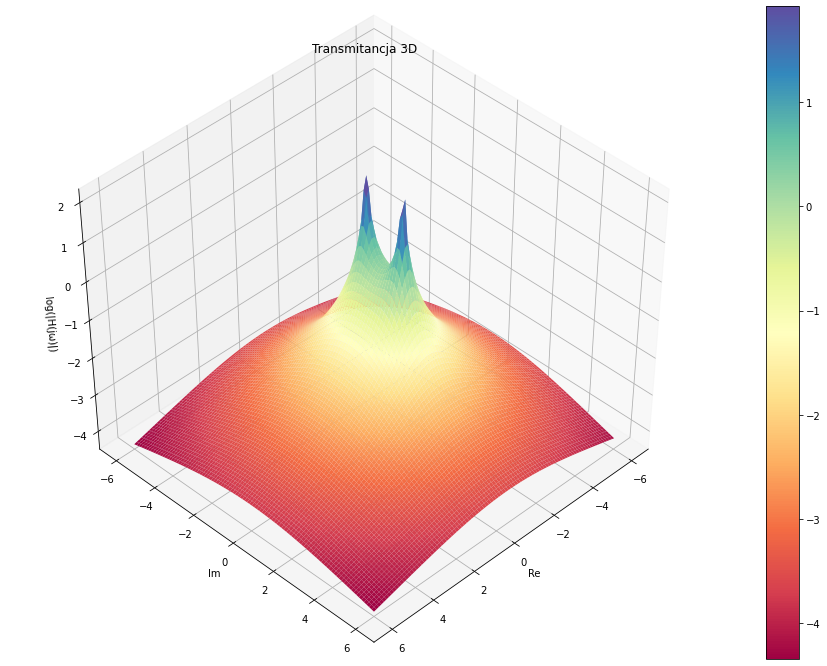

In [13]:
#trójwymiarowy wykres transmitancji w funkcji zmiennej "s" dla przypadku drgań sinusoidalnych gasnących

C, L, R = 1, 1, 1

B = np.poly1d([          1])
A = np.poly1d([C*L, C*R, 1])

Re     = np.linspace(-6, 6, 100)
Im     = np.linspace(-6, 6, 100)
RE, IM = np.meshgrid(Re, Im) #2D planes
s      = RE + IM*1j
H      = B(s)/A(s)
M      = np.abs(H)

fig = plt.figure(figsize=(16, 12))
ax  = fig.gca   (projection='3d')
srf = ax.plot_surface(RE, IM, np.log(M), cmap='Spectral', cstride=1, rstride=1)
ax.set_xlabel("Re")
ax.set_ylabel("Im")
ax.set_zlabel("log(|H(jω)|)")
ax.set_title('Transmitancja 3D')
ax.view_init(45, 45)
fig.colorbar(srf) # add a color bar which maps values to colors
fig.show()